<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/wwa/blob/main/2_chaotic_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the benchmark function
def benchmark_function(x):
    result = np.sin(x) + np.cos(0.5 * x)
    return np.clip(result, -10, 10)

# Define the PSO algorithm with chaotic parameter adaptation
def chaotic_pso(benchmark_func, num_particles, num_iterations):
    # Define the chaotic map function
    def chaotic_map(x, a):
        result = (4 * a * x * (1 - x))
        return np.clip(result, -10, 10)   # Logistic map equation

    # Initialize particles' positions and velocities
    positions = np.random.uniform(low=-10, high=10, size=(num_particles,))
    velocities = np.random.uniform(low=-1, high=1, size=(num_particles,))

    # Initialize global best position and corresponding value
    global_best_pos = positions[0]
    global_best_val = benchmark_func(global_best_pos)

    # Initialize lists to store best positions and values at each iteration
    best_positions = [global_best_pos]
    best_values = [global_best_val]

    # PSO main loop
    for _ in range(num_iterations):
        a = np.random.uniform(low=2.9, high=4.0)  # Chaotic map parameter

        for i in range(num_particles):
            # Update particle's velocity using chaotic map
            velocities[i] = velocities[i] + 2 * chaotic_map(best_positions[-1] - positions[i], a) \
                            + 2 * chaotic_map(global_best_pos - positions[i], a)

            # Update particle's position
            positions[i] = positions[i] + velocities[i]

            # Update global best position and value
            particle_val = benchmark_func(positions[i])
            if particle_val < global_best_val:
                global_best_pos = positions[i]
                global_best_val = particle_val

        # Store best position and value at each iteration
        best_positions.append(global_best_pos)
        best_values.append(global_best_val)

    return best_positions, best_values

In [19]:
# Example usage
num_particles = 20
num_iterations = 100

best_positions, best_values = chaotic_pso(benchmark_function, num_particles, num_iterations)

Best Solutions:
Iteration 1: pos(x)=4.707040129656342==>value(y)=-1.7051988452550206
Iteration 101: pos(x)=-49028.96841424254==>value(y)=-1.7601645534550245


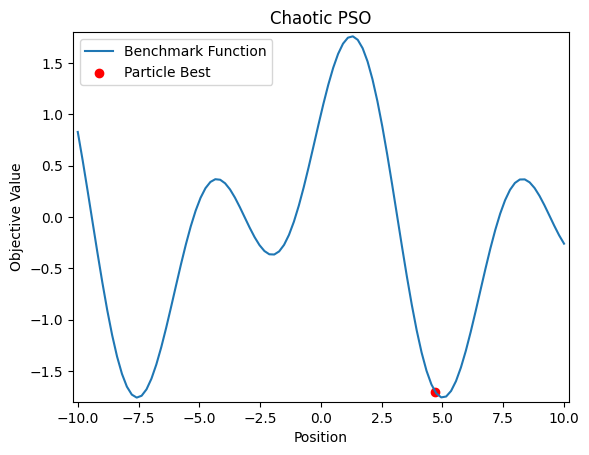

In [20]:
# Print the best solutions
print("Best Solutions:")
for i, pos in enumerate(best_positions):
    if i % num_iterations==0:
      print(f"Iteration {i+1}: pos(x)={pos}==>value(y)={best_values[i]}")

# Plotting the optimization process
x = np.linspace(-10, 10, 100)
y_benchmark = benchmark_function(x)

plt.plot(x, y_benchmark, label="Benchmark Function")
plt.scatter(best_positions, best_values, c='r', label="Particle Best")
plt.xlabel("Position")
plt.ylabel("Objective Value")
plt.title("Chaotic PSO")
plt.legend()
plt.xlim(-10.2, 10.2)
plt.ylim(-1.8, 1.8)
plt.show()